In [1]:
# # Importing standard Qiskit libraries
# from qiskit import QuantumCircuit, transpile
# from qiskit.tools.jupyter import *
# from qiskit.visualization import *


# # qiskit-ibmq-provider has been deprecated.
# # Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# # Loading your IBM Quantum account(s)
# service = QiskitRuntimeService(channel="ibm_quantum")

# # Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# # result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [1]:
from qiskit.quantum_info import SparsePauliOp
def return_chain(N_chain,value = 1):
    Total = []
    for j in range(N_chain):
        temp=""
        for k in range(N_chain):
            if k==j or k==(j+1)%N_chain:
                temp+="Z"
            else:
                temp+="I"
        Total .append((temp,value))
    return Total


# H2_op = SparsePauliOp.from_list([("ZZI", -1),("ZIZ", -1),("IZZ", -1)] )
H2_op = SparsePauliOp.from_list(return_chain(2))



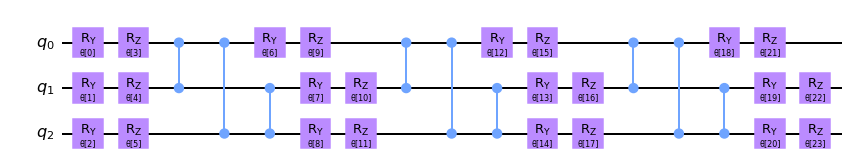

In [2]:
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.optimizers import SLSQP

ansatz = TwoLocal(3, rotation_blocks=["ry", "rz"], entanglement_blocks="cz", reps=3)

optimizer = SLSQP()
ansatz.decompose().draw('mpl')

In [3]:
from qiskit.primitives import Sampler, Estimator
from qiskit.algorithms.state_fidelities import ComputeUncompute

estimator = Estimator()
sampler = Sampler()
fidelity = ComputeUncompute(sampler)

In [6]:
k = 4
betas = [100 for _ in range(k)]

In [7]:
counts = []
values = []
steps = []

def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

In [8]:
from qiskit.algorithms.eigensolvers import VQD

vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k, betas=betas, callback=callback)
result = vqd.compute_eigenvalues(operator = H2_op)
vqd_values = result.optimal_values

In [9]:
print (result)


{   'aux_operators_evaluated': None,
    'cost_function_evals': array([123, 562, 242, 279]),
    'eigenvalues': array([-1.99999951+0.j, -1.99999999+0.j,  1.99999987+0.j,  1.99999963+0.j]),
    'optimal_circuits': [   <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7fd2e97a7cd0>,
    'optimal_parameters': [   {   ParameterVectorElement(θ[15]): -1.3960739281068628,
                                  ParameterVectorElement(θ[14]): -4.88403159987583,
                                  ParameterVectorElement(θ[13]): -3.0805883858834457,
                                  ParameterVectorElement(θ[12]): -4.671270044532635,
                                  ParameterVectorElement(θ[11]): -4.4460104643608345,
                                  ParameterVectorElement(θ[10]): -3.453379472204272,
                                  ParameterVectorElement(θ[8]): -4.300965154137485,
                                  ParameterVectorElement(θ[2]): -5.0883094799547965,
                        

In [10]:
print(vqd_values)

[[ 3.69136773e+00 -1.53479904e+00 -5.08830948e+00  1.73662995e+00
   3.24026933e+00 -1.74256134e+00 -9.16541765e-01 -1.65395653e+00
  -4.30096515e+00  2.32421984e+00 -3.45337947e+00 -4.44601046e+00
  -4.67127004e+00 -3.08058839e+00 -4.88403160e+00 -1.39607393e+00]
 [-1.57343943e+05  1.72316261e+05 -1.22583436e+04 -3.55669744e+05
   2.14338713e+05  1.07061663e+03 -1.36680657e+05  6.31540769e+04
  -1.40883322e+05 -2.78171659e+05 -6.00955991e+04 -4.80511875e+04
  -1.88139178e+05 -1.73739669e+05 -6.08622890e+04  6.07442792e+04]
 [ 3.28991648e+00 -1.82913175e+00 -4.92702352e+00  1.73594110e+00
   3.09973860e+00 -1.94370767e+00 -4.70782777e-01 -3.58935908e-01
  -3.34561702e+00  2.99947449e+00 -4.23552085e+00 -5.39034349e+00
  -3.06280272e+00 -1.60626315e+00 -4.88387398e+00 -1.39623409e+00]
 [ 4.97322408e+00 -1.58558206e+00 -4.97711108e+00  2.08485290e+00
   3.86964520e+00 -1.68876233e+00 -4.54547285e-01 -3.54135852e-01
  -4.52104134e+00  2.84033428e+00 -3.48449617e+00 -5.24176369e+00
  -3.38

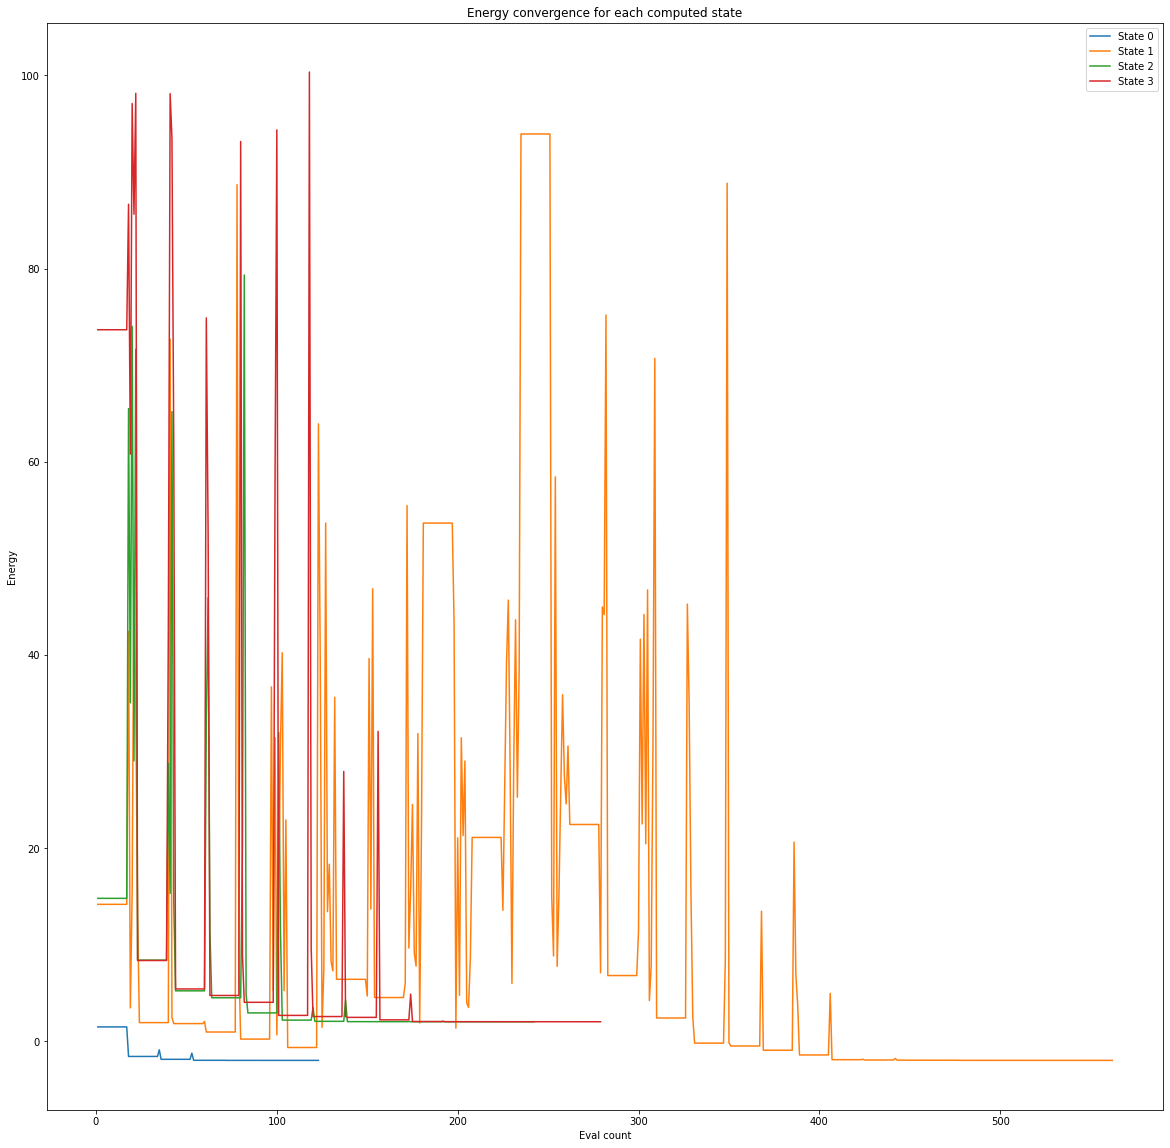

In [11]:
import numpy as np
import pylab

pylab.rcParams["figure.figsize"] = (20, 20)


steps = np.asarray(steps)
counts = np.asarray(counts)
values = np.asarray(values)

for i in range(1,5):
    _counts = counts[np.where(steps == i)]
    _values = values[np.where(steps == i)]
    pylab.plot(_counts, _values, label=f"State {i-1}")
    
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for each computed state")
pylab.legend(loc="upper right");



In [12]:
from qiskit.algorithms.eigensolvers import NumPyEigensolver
from qiskit.opflow import PauliSumOp

exact_solver = NumPyEigensolver(k=10)
exact_result = exact_solver.compute_eigenvalues(PauliSumOp(H2_op))
ref_values = exact_result.eigenvalues

<ipython-input-12-af272578c5e9>:5: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  exact_result = exact_solver.compute_eigenvalues(PauliSumOp(H2_op))


In [13]:
print(f"Reference values: {ref_values}")
print(f"VQD values: {np.array([k[-1] for k in vqd_values])}")

Reference values: [-2.+0.j -2.+0.j  2.+0.j  2.+0.j]
VQD values: [-1.39607393e+00  6.07442792e+04 -1.39623409e+00 -1.81114678e+00
 -1.81114678e+00]
